# Project name: Data Science and Machine Learning Automation
Created by: Avinash Sharma

emailid: avinashsharma99@gmail.com

## Project Description:   

This project is an effort to automate most of the data science and machine learning concepts with minimal user intervention. The input data will be a url of any dataset of labelled dataset and output will suggest the best machine learning algorithm for the dataset.

## Prerequisite:
End user should be aware of his/her input dataset and should identify in advance which column he wants to consider as Target/Labelled column.

In [300]:
url = input("Enter complete url of dataset: ")

Enter complete url of dataset: https://raw.githubusercontent.com/avinashsharma99/titatnic_data/master/titanic_train.csv


In [301]:
url

'https://raw.githubusercontent.com/avinashsharma99/titatnic_data/master/titanic_train.csv'

In [302]:
!pip install wget

#### Downloading dataset frm the url

In [303]:
import wget 

In [304]:
dataset = wget.download(url)

**Importing libraries** which are being used in this project

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [349]:
df = pd.read_csv(dataset)
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Code to ask user about **Label/Target Column** from the database so that we can seggregate Target and Featured Columns.

In [307]:
print('Name of columns in the database:\n')
columnnames = list(df.columns.values)
print (columnnames)
while True:
    try:
        targetcolumn = input ('Enter target column name: -> ')
        if targetcolumn in columnnames:
            print ('\n You selected *', targetcolumn, '* as your target column')
            break
        else:
            print ('\n Incorrect column name')
    except ValueError:
        print ('\n There is no column name ', targetcolumn, 'in database')   

Name of columns in the database:

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Enter target column name: -> Survived

 You selected * Survived * as your target column


Dropping **target column** from the dataframe df

In [308]:
df.drop([targetcolumn], axis=1, inplace=True)

## Null Value visualisation

Pictorial representation of null values in each columns using **Seaborn heatmap** chart

The following chart is a pictorial representation of null values in each column. 

 The yellow patches are null values in respective columns.


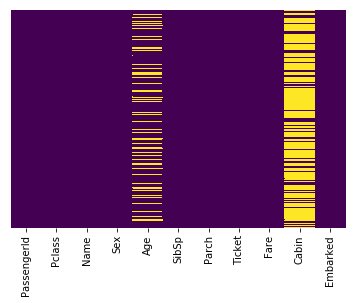

In [309]:
print ('The following chart is a pictorial representation of null values in each column. \n\n The yellow patches are null values in respective columns.')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Treatment of Null Values

Code to didplay table of **percentage of Null values** in each column

In [310]:
total_na_values = df.isnull().sum().sort_values(ascending=False)
percentage = df.isnull().sum()/df.isnull().count()*100
percentage_sort = (round(percentage, 1)).sort_values(ascending=False)
empty_cells = pd.concat([total_na_values, percentage_sort], axis=1, keys=['Empty_cell_count', '% of empty to total count'])
empty_cells

,Empty_cell_count,% of empty to total count
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Coding for dropping column contains more than **20% Null Values**

In [311]:
df_subset = df
column_names = list(df_subset.columns)

null_columns = []

for names in column_names:
    percentage = df_subset[names].isnull().sum()/df_subset[names].isnull().count()*100
    #print (percentage)
    if percentage > 20:
        null_columns.append(names)
        df.drop([names], axis=1, inplace=True)

print ('Following column(s) dropped from dataset as they contain more than 20 % unique null values in it.')
print (null_columns) 

Following column(s) dropped from dataset as they contain more than 20 % unique null values in it.
['Cabin']


Code of filling Null values with **Mean value** of respective columns.

In [312]:
df = df.fillna(df.mean().round(2))
df.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


## Treatment of columns with Text Values

Code to display a table with information of Column names which has only **text values** in it and how many unique values each columns contains

In [313]:
df_textcolumns = df.select_dtypes(exclude=[np.number])
column_names = list(df_textcolumns.columns)

unique_no = []

for names in column_names:
#    print (names, 'column has', len(df_subset[names].unique()), 'unique names in it' )
    unique_no.append(len(df_textcolumns[names].unique()))

df_text_table_temp = pd.DataFrame({'Column Name' : list(df_textcolumns.columns), 'No of unique values' : unique_no})
df_text_table_temp

,Column Name,No of unique values
0,Name,891
1,Sex,2
2,Ticket,681
3,Embarked,4


Code to **remove** the columns from the dataset which contains **more than five unique text values** in it. 

In [314]:
for names in column_names:
    if len(df_textcolumns[names].unique()) > 5:
        print ('Following column dropped from dataset as they contain more than five unique names/strings in it.')
        print (names)
        df_textcolumns.drop([names], axis=1, inplace=True)   
   #     df.drop([names], axis=1, inplace=True)   
        

Following column dropped from dataset as they contain more than five unique names/strings in it.
Name
Following column dropped from dataset as they contain more than five unique names/strings in it.
Ticket


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## One Hot encoding

Applying **One Hot Encoding** method to remaining text columns so that machine learning algorithms can be applied.  

in the coding, dropping original text columns and renaming new columns with suffix original column names + unique text values.


In [315]:
column_names = list(df_textcolumns.columns)

for columns in column_names:
    dummy = pd.get_dummies(df_textcolumns[columns], drop_first=False)
    dummy.columns = columns + '_' + dummy.columns
    df_textcolumns.drop([columns], axis=1, inplace=True)
    df_textcolumns = pd.concat([df_textcolumns, dummy], axis = 1)

df_textcolumns.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


### Merging featured text columns and number columns in a single dataframe

In [316]:
df_numbercolumns = df.select_dtypes(include=[np.number])

In [317]:
df_featured = pd.concat([df_textcolumns, df_numbercolumns], axis = 1)
df_featured.head(10)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,1,3,22.0,1,0,7.2500
1,1,0,1,0,0,2,1,38.0,1,0,71.2833
2,1,0,0,0,1,3,3,26.0,0,0,7.9250
3,1,0,0,0,1,4,1,35.0,1,0,53.1000
4,0,1,0,0,1,5,3,35.0,0,0,8.0500
5,0,1,0,1,0,6,3,29.7,0,0,8.4583
6,0,1,0,0,1,7,1,54.0,0,0,51.8625
7,0,1,0,0,1,8,3,2.0,3,1,21.0750
8,1,0,0,0,1,9,3,27.0,0,2,11.1333
9,1,0,1,0,0,10,2,14.0,1,0,30.0708


### Storing target column values as df_target

In [318]:
df_target = pd.read_csv(dataset, usecols = [targetcolumn])
df_target.head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## Correlation Heatmap

The following map display the **correlation** between each columns in the database

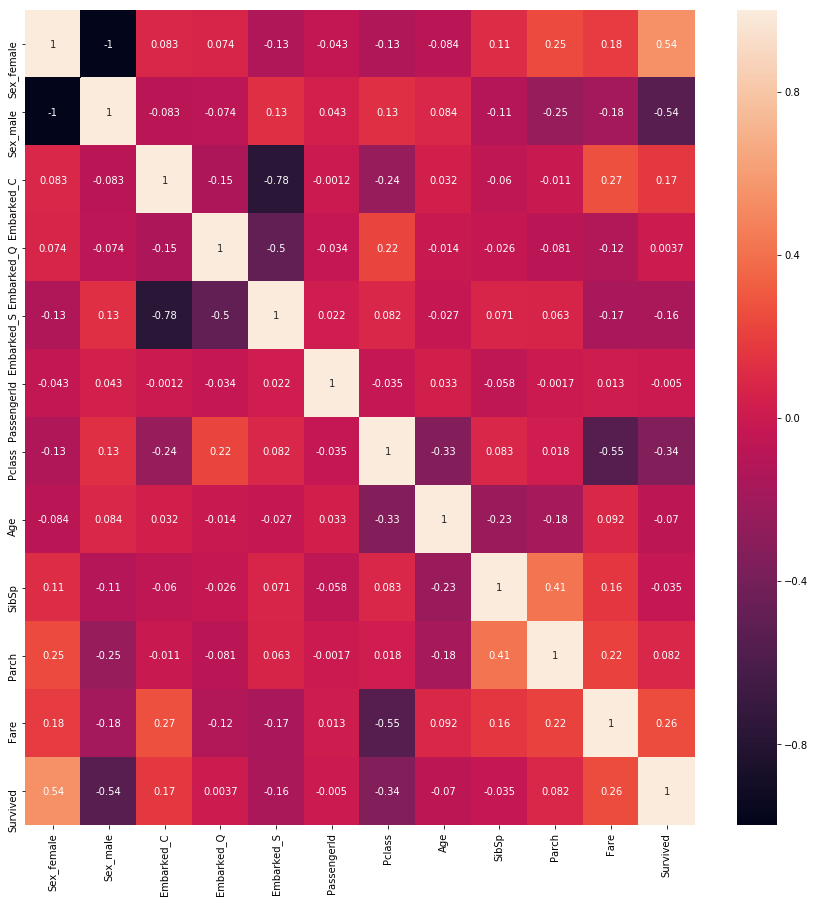

In [319]:
df_all_columns = pd.concat([df_featured, df_target], axis = 1)

correlation_matrix = df_all_columns.corr()
fig, ax = plt.subplots(figsize=(15,15))     
sns.heatmap(correlation_matrix, cbar = True, annot = True, ax=ax)

# Machine Learning 

In this section, we will apply four different machine learning algorithm to cleanr dataset and see which one is best fit for particular dataset.

In [320]:
X = df_featured.values
y = df_target.values

### Applying Standard Scaling to Featured data

In [321]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]    

array([[-0.73769513,  0.73769513, -0.48204268, -0.30756234,  0.61930636,
        -1.73010796,  0.82737724, -0.59249409,  0.43279337, -0.47367361,
        -0.50244517],
       [ 1.35557354, -1.35557354,  2.0745051 , -0.30756234, -1.61470971,
        -1.72622007, -1.56610693,  0.63877552,  0.43279337, -0.47367361,
         0.78684529],
       [ 1.35557354, -1.35557354, -0.48204268, -0.30756234,  0.61930636,
        -1.72233219,  0.82737724, -0.28467669, -0.4745452 , -0.47367361,
        -0.48885426],
       [ 1.35557354, -1.35557354, -0.48204268, -0.30756234,  0.61930636,
        -1.71844431, -1.56610693,  0.40791247,  0.43279337, -0.47367361,
         0.42073024],
       [-0.73769513,  0.73769513, -0.48204268, -0.30756234,  0.61930636,
        -1.71455642,  0.82737724,  0.40791247, -0.4745452 , -0.47367361,
        -0.48633742]])

### Pre-processing data using Train Test Split

In [322]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (668, 11) (668, 1)
Test set: (223, 11) (223, 1)


# Supervised Learning Algorithms

## KNN Algorithm

In [323]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [324]:
yhat_neigh = neigh.predict(X_test)
yhat_neigh[0:5]

array([0, 0, 1, 1, 0])

In [325]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_neigh))

Train set Accuracy:  0.8577844311377245
Test set Accuracy:  0.8430493273542601


In [326]:
Ks = 15
accuracy_knn = []
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_neigh=neigh.predict(X_test)
    accuracy_knn.append(metrics.accuracy_score(y_test, yhat_neigh))

accuracy_knn

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/_

[0.7847533632286996,
 0.8385650224215246,
 0.820627802690583,
 0.8430493273542601,
 0.8340807174887892,
 0.8430493273542601,
 0.8475336322869955,
 0.852017937219731,
 0.8565022421524664,
 0.8475336322869955,
 0.8475336322869955,
 0.8475336322869955,
 0.8475336322869955,
 0.8430493273542601]

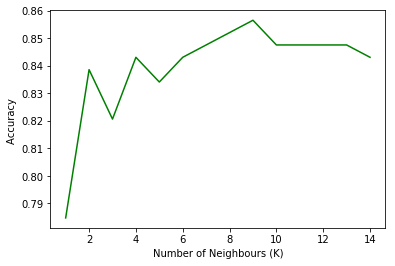

In [327]:
plt.plot(range(1,Ks), accuracy_knn,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

In [328]:
accuracy_knn_best = max(accuracy_knn)
print( "The best accuracy for KNN algorithm on this dataset is ", accuracy_knn_best, "with k=", accuracy_knn.index(max(accuracy_knn))+1) 

The best accuracy for KNN algorithm on this dataset is  0.8565022421524664 with k= 9


## Decision Tree Algorithm

In [329]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [330]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [331]:
predTree = dtree.predict(X_test)

In [332]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
accuracy_dtree_best =  metrics.accuracy_score(y_test, predTree)

DecisionTrees's Accuracy:  0.7713004484304933


## Support Vector Machine Algorithm

In [333]:
#Create a SVM Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [334]:
yhat_clf = clf.predict(X_test)
yhat_clf [0:5]

array([0, 0, 1, 1, 0])

In [335]:
# Model Accuracy, how often is the classifier correct?
print("Support Vector Machine's Accuracy: ", metrics.accuracy_score(y_test, yhat_clf))
accuracy_svm_best =  metrics.accuracy_score(y_test, yhat_clf)

Support Vector Machine's Accuracy:  0.852017937219731


## Random Forest Algorithm

In [336]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [337]:
# Model Accuracy, how often is the classifier correct?
print("Random Forest's Accuracy:", metrics.accuracy_score(y_test, y_pred_rfc))
rfc_accuracy_best = metrics.accuracy_score(y_test, y_pred_rfc)

Random Forest's Accuracy: 0.8699551569506726


## Naive Base Algorithm

In [338]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [339]:
# making predictions on the testing set 
y_pred_gnb = gnb.predict(X_test)

In [340]:
# comparing actual response values (y_test) with predicted response values (y_pred_gnb) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy", metrics.accuracy_score(y_test, y_pred_gnb))
accuracy_best_naive = metrics.accuracy_score(y_test, y_pred_gnb)

Gaussian Naive Bayes model accuracy 0.8251121076233184


## Features importance in dataset

In [341]:
# The following code shows us which features were more important in the dataset and which were less important

In [342]:
feature_imp = pd.Series(rfc.feature_importances_,index=df_featured.columns).sort_values(ascending=False)
feature_imp

Fare           0.193345
PassengerId    0.184027
Age            0.165922
Sex_male       0.148055
Sex_female     0.117116
Pclass         0.076259
SibSp          0.041789
Parch          0.032304
Embarked_S     0.016600
Embarked_C     0.014941
Embarked_Q     0.009642
dtype: float64

No handles with labels found to put in legend.


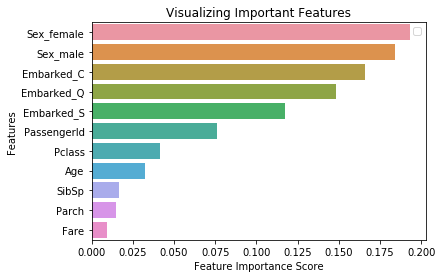

In [343]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=df_featured.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Table showing different algorithm's accuracy score for input dataset

In [344]:
 accuracy_table = pd.DataFrame([{'Algorithm': "KNN", 'Accuracy': accuracy_knn_best}, 
                                {'Algorithm': "Decision Tree", 'Accuracy': accuracy_dtree_best}, 
                                {'Algorithm': "Support VectorMachine", 'Accuracy': accuracy_svm_best}, 
                                {'Algorithm': "Random Forest", 'Accuracy': rfc_accuracy_best}, 
                                {'Algorithm': "Naive Base", 'Accuracy': accuracy_best_naive}] )

In [345]:
result = accuracy_table[['Algorithm','Accuracy']]

In [346]:
result.sort_values(by=['Accuracy'], ascending=False, inplace=True)

In [347]:
result

,Algorithm,Accuracy
3,Random Forest,0.869955
0,KNN,0.856502
2,Support VectorMachine,0.852018
4,Naive Base,0.825112
1,Decision Tree,0.771300


In [348]:
print ('The best algorithm for this particular data set is \n : ', result.head(1))

The best algorithm for this particular data set is 
 :         Algorithm  Accuracy
3  Random Forest  0.869955
